# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [4]:
print(iris.keys())

print(iris.data[0:10])

print(type(iris.data))

print(iris.target_names)

print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [88]:
# we only take the first two features. 
X = iris.data[:,:2]
print(x.shape)

Y = iris.target
print(y.shape)

# print(iris.target_name[:,:2])

(150, 4)
(150, 1)


In [123]:
iris['feature_names'][0:2]

['sepal length (cm)', 'sepal width (cm)']

In [89]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [19]:
print("target_name: "+str(iris['target_names']))

target_name: ['setosa' 'versicolor' 'virginica']


In [20]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'], columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [21]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x,y],axis=1)
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [22]:
#只取指定的
iris_data = pd.concat([x,y],axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data.head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [24]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


In [27]:
print(iris['data'].size)
print(iris['data'].size/len(iris['feature_names']))

600
150.0


## 切分訓練集與測試集
> train_test_split()

In [93]:
from sklearn.model_selection import train_test_split


In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_data[['sepal length (cm)','petal length (cm)','target']],iris_data[['target']],test_size=0.2)

In [95]:
X_train.head()
# X_train.shape

,sepal length (cm),petal length (cm),target
75,6.6,4.4,1
41,4.5,1.3,0
27,5.2,1.5,0
21,5.1,1.5,0
31,5.4,1.5,0


In [96]:
X_test.head()
# X_test.shape

,sepal length (cm),petal length (cm),target
90,5.5,4.4,1
99,5.7,4.1,1
57,4.9,3.3,1
51,6.4,4.5,1
70,5.9,4.8,1


In [97]:
Y_train.head()
# Y_train.shape

,target
75,1
41,0
27,0
21,0
31,0


In [98]:
Y_test.head()
# Y_test.shape

,target
90,1
99,1
57,1
51,1
70,1


#  Appendix
    normailzation和standardization是差不多的
    都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。
* nomalization一般是把數據限定在需要的範圍，比如一般都是[0，1]，從而消除了數據量對建模的影響。
* standardaization 一般是指將數據正態化，使平均值0方差為1。

因此nomalization和standardization是針對數據而言的，消除一些數據差異帶來的特種重要性偏見。
經過歸一化的數據，能加快訓練數度，促進算法的收斂。

# Sandardization(z-score)

    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.

In [99]:
from IPython.display import Math
Math(r'x^{(i)}_{\text{norm}} = \frac{x^{(i)} - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}')

<IPython.core.display.Math object>

In [100]:
Math(r'x^{(i)}_{std}=\frac{x^{(i)}-\mu_{x}}{\sigma_{x}}')

<IPython.core.display.Math object>

In [104]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [112]:
stats = norm_stats(X_test)
arr_x_test = np.array(z_score(X_test, stats))
arr_x_test

# arr_y_train = np.array(Y_train)
# arr_y_train[:5]

array([[-0.10526747,  0.84111427,  0.73379939],
       [ 0.21863244,  0.6148055 ,  0.73379939],
       [-1.07696721,  0.01131544,  0.73379939],
       [ 1.35228214,  0.91655053,  0.73379939],
       [ 0.54253235,  1.1428593 ,  0.73379939],
       [ 1.67618205,  0.99198679,  0.73379939],
       [-0.59111734, -1.42197346, -1.36277029],
       [ 1.19033218,  1.06742304,  0.73379939],
       [-0.91501725,  0.16218795,  0.73379939],
       [-1.56281708, -1.3465372 , -1.36277029],
       [-0.10526747,  0.31306047,  0.73379939],
       [-1.23891717, -1.04479217, -1.36277029],
       [-1.23891717, -1.42197346, -1.36277029],
       [ 0.70448231,  0.53936924,  0.73379939],
       [-0.26721743, -1.19566468, -1.36277029],
       [-0.42916738, -1.3465372 , -1.36277029],
       [-0.91501725, -1.3465372 , -1.36277029],
       [ 0.05668248,  0.6148055 ,  0.73379939],
       [ 0.86643227,  1.06742304,  0.73379939],
       [ 1.838132  ,  0.84111427,  0.73379939]])

In [25]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_y_train = np.array(y_train)
arr_x_train[:5]

array([[-0.72966298, -0.79523439],
       [-0.72966298, -1.07013023],
       [ 1.27990064,  1.19776044],
       [ 0.6100461 , -1.07013023],
       [-0.56219935, -0.72651043]])

## use sklearn

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_test)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.565 3.285 0.65 ]
[0.6174747 1.3256225 0.4769696]


In [114]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_test)
X_train_std[:5]

array([[-0.10526747,  0.84111427,  0.73379939],
       [ 0.21863244,  0.6148055 ,  0.73379939],
       [-1.07696721,  0.01131544,  0.73379939],
       [ 1.35228214,  0.91655053,  0.73379939],
       [ 0.54253235,  1.1428593 ,  0.73379939]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [124]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[-0.10526747  0.84111427  0.73379939]
 [ 0.21863244  0.6148055   0.73379939]
 [-1.07696721  0.01131544  0.73379939]
 [ 1.35228214  0.91655053  0.73379939]
 [ 0.54253235  1.1428593   0.73379939]
 [ 1.67618205  0.99198679  0.73379939]
 [-0.59111734 -1.42197346 -1.36277029]
 [ 1.19033218  1.06742304  0.73379939]
 [-0.91501725  0.16218795  0.73379939]
 [-1.56281708 -1.3465372  -1.36277029]]


you can also use fit_transform method (i.e., fit and then transform)    

In [125]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[-0.10526747  0.84111427  0.73379939]
 [ 0.21863244  0.6148055   0.73379939]
 [-1.07696721  0.01131544  0.73379939]
 [ 1.35228214  0.91655053  0.73379939]
 [ 0.54253235  1.1428593   0.73379939]
 [ 1.67618205  0.99198679  0.73379939]
 [-0.59111734 -1.42197346 -1.36277029]
 [ 1.19033218  1.06742304  0.73379939]
 [-0.91501725  0.16218795  0.73379939]
 [-1.56281708 -1.3465372  -1.36277029]]


In [126]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.42084468152937
30.424547333503423


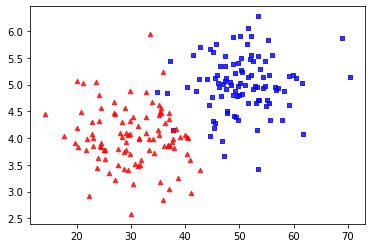

In [127]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [128]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [129]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [130]:
minmax_norm(x_val[:10])

array([0.79359726, 0.30689305, 0.69866457, 0.46723568, 0.42731263,
       0.91767637, 0.75032048, 0.50081183, 1.        , 0.        ])

In [132]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val=x_val.reshape(-1, 1) #要先把維度從1D變2D
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.data_min_)

print(scaler.transform(x_val)[:10])

(200, 1)
[70.32072855]
[14.25525878]
[[0.68071118]
 [0.50773022]
 [0.64697088]
 [0.56471806]
 [0.55052889]
 [0.7248105 ]
 [0.66533006]
 [0.57665146]
 [0.75406939]
 [0.39865646]]
